In [51]:
from io import BytesIO
import numpy as np
from tensorflow.python.lib.io import file_io
import pandas as pd
import matplotlib.pyplot as plt


In [86]:
file_full_path='gs://ecg-data/test-results/iden-chinaprivate/testset_results_china_private-2021-03-31-04-18-58.csv'
f = BytesIO(file_io.read_file_to_string(file_full_path, binary_mode=True))
np_data_loaded = np.loadtxt(f, delimiter=' ')

In [87]:
identif_attributes = pd.DataFrame(data=np_data_loaded)
identif_attributes.columns=['y_pred','y_actual','patient_id','diagnosis','age','gender','race']

In [88]:
identif_attributes.head()

,y_pred,y_actual,patient_id,diagnosis,age,gender,race
0,7339.0,7339.0,7480.0,14.0,80.0,1.0,0.0
1,23943.0,23943.0,24594.0,4343.0,47.0,0.0,0.0
2,21470.0,21470.0,22006.0,1172.0,77.0,1.0,0.0
3,25582.0,25582.0,26291.0,4628.0,51.0,1.0,0.0
4,32412.0,32412.0,33478.0,3448.0,73.0,0.0,0.0


In [89]:
missidentifications1=identif_attributes[identif_attributes['y_actual']!=identif_attributes['y_pred']]


In [90]:
identifications1=identif_attributes[identif_attributes['y_actual']==identif_attributes['y_pred']]


### by diagnosis

In [91]:
missidentifications_condition_count=missidentifications1.groupby(['diagnosis']).size().reset_index(name='miss_count')


In [92]:
missidentifications_condition_count.head()

,diagnosis,miss_count
0,3.0,1
1,14.0,129
2,18.0,1
3,19.0,2
4,38.0,1


In [93]:
identifications_condition_count=identifications1.groupby(['diagnosis']).size().reset_index(name='correct_count')


In [94]:
identifications_condition_count.head()

,diagnosis,correct_count
0,0.0,3
1,1.0,1
2,2.0,9
3,3.0,1
4,4.0,3


In [95]:
merged=identifications_condition_count.merge(missidentifications_condition_count, how='outer', on=['diagnosis'])


In [96]:
merged.head()

,diagnosis,correct_count,miss_count
0,0.0,3.0,NaN
1,1.0,1.0,NaN
2,2.0,9.0,NaN
3,3.0,1.0,1.0
4,4.0,3.0,NaN


In [97]:
merged=merged.fillna(0)

In [98]:
merged.head()

,diagnosis,correct_count,miss_count
0,0.0,3.0,0.0
1,1.0,1.0,0.0
2,2.0,9.0,0.0
3,3.0,1.0,1.0
4,4.0,3.0,0.0


In [99]:
merged['sum_classifications']=merged['correct_count']+merged['miss_count']

In [100]:
merged.head()

,diagnosis,correct_count,miss_count,sum_classifications
0,0.0,3.0,0.0,3.0
1,1.0,1.0,0.0,1.0
2,2.0,9.0,0.0,9.0
3,3.0,1.0,1.0,2.0
4,4.0,3.0,0.0,3.0


In [106]:
merged['rate']=merged['miss_count']/merged['sum_classifications']
merged.head(n=10)

,diagnosis,correct_count,miss_count,sum_classifications,rate
0,0.0,3.0,0.0,3.0,0.0
1,1.0,1.0,0.0,1.0,0.0
2,2.0,9.0,0.0,9.0,0.0
3,3.0,1.0,1.0,2.0,0.5
4,4.0,3.0,0.0,3.0,0.0
5,5.0,2.0,0.0,2.0,0.0
6,6.0,4.0,0.0,4.0,0.0
7,7.0,2.0,0.0,2.0,0.0
8,8.0,1.0,0.0,1.0,0.0
9,9.0,3.0,0.0,3.0,0.0


In [107]:
merged.shape

(4608, 5)

In [108]:
output_csv_file_path='/Users/aring/Desktop/ECG-identification/Arnold-data/china_private1_labels_all_new2.csv'
labels=pd.read_csv(output_csv_file_path)
labels.head()

,dataset_name,patient_id,file_name,age,gender,diagnosis,race,sample_num,race_encoded,gender_encoded,diagnosis_encoded,patient_id_encoded
0,china_private,880947374,MUSE_20180115_124154_98000.csv,20,Female,STach,chinese,0,0,1,4739,33270
1,china_private,880957431,MUSE_20180112_071158_01000.csv,22,Female,STach,chinese,0,0,1,4739,34652
2,china_private,880878772,MUSE_20180114_123835_64000.csv,67,Female,CLBBB CVCL STach,chinese,0,0,1,2380,25921
3,china_private,2968425,MUSE_20180210_124733_04000.csv,68,Male,AMI CVCL LAnFB RRWP SNR STE TTW,chinese,0,0,0,1692,16604
4,china_private,10956457,MUSE_20180118_173322_76000.csv,65,Female,CVCL STach TAb,chinese,0,0,1,2773,6099


In [109]:
daignosis_labels=labels.loc[:,['diagnosis_encoded','diagnosis']].drop_duplicates()


In [110]:
merged.columns=['diagnosis_encoded','correct_count','miss_count','sum_classifications','rate']


In [111]:
merged=merged.merge(daignosis_labels, how='inner', on=['diagnosis_encoded'])

In [112]:
merged.head()

,diagnosis_encoded,correct_count,miss_count,sum_classifications,rate,diagnosis
0,0.0,3.0,0.0,3.0,0.0,AAR
1,1.0,1.0,0.0,1.0,0.0,AAR AMI LQT QAb STE TAb
2,2.0,9.0,0.0,9.0,0.0,AAR AnMI LAD STC
3,3.0,1.0,1.0,2.0,0.5,AAR Atrial_Escape_Beat PAC SB
4,4.0,3.0,0.0,3.0,0.0,AAR CRBBB STE


In [113]:
merged.shape

(4608, 6)

In [114]:
daignosis_labels.diagnosis.unique().size

4764

In [115]:
daignosis_labels.shape

(4764, 2)

In [116]:
daignosis_labels.diagnosis.unique().shape

(4764,)

In [141]:
root_path='/Users/aring/Desktop/ECG-identification/Arnold-data'
new_diagnoses_codes_df = pd.read_csv(root_path+'/SXNBData_China_DiagnosisCode.csv')
new_diagnoses_codes_df.head(n=100)

,ID,DiagCode
0,MUSE_20180113_180130_23000,STach
1,MUSE_20180113_180131_30000,STach
2,MUSE_20180113_180139_35000,STach
3,MUSE_20180113_180143_59000,STach
4,MUSE_20180113_131105_22000,VEsR
...,...,...
95,MUSE_20180116_131237_15000,AF PR TAb TInv
96,MUSE_20180116_131235_03000,AF TAb
97,MUSE_20180116_131239_26000,AF TAb
98,MUSE_20180116_131240_34000,AF TAb


In [118]:
new_diagnoses_codes_df.DiagCode.unique().shape

(4764,)

### by gender


In [119]:
missidentifications_gender_count=missidentifications1.groupby(['gender']).size().reset_index(name='miss_count')
identifications_gender_count=identifications1.groupby(['gender']).size().reset_index(name='correct_count')


In [120]:
missidentifications_gender_count.head()

,gender,miss_count
0,0.0,1250
1,1.0,768
2,2.0,2


In [121]:
identifications_gender_count.head()

,gender,correct_count
0,0.0,53203
1,1.0,44280
2,2.0,80


In [122]:
merged=identifications_gender_count.merge(missidentifications_gender_count, how='outer', on=['gender'])


In [123]:
merged['sum_classifications']=merged['correct_count']+merged['miss_count']

In [124]:
merged['rate']=merged['miss_count']/merged['sum_classifications']


In [125]:
merged.head()

,gender,correct_count,miss_count,sum_classifications,rate
0,0.0,53203,1250,54453,0.022956
1,1.0,44280,768,45048,0.017048
2,2.0,80,2,82,0.024390


### by age

In [126]:
missidentifications_age_count=missidentifications1.groupby(['age']).size().reset_index(name='miss_count')
identifications_age_count=identifications1.groupby(['age']).size().reset_index(name='correct_count')

In [127]:
missidentifications_age_count=missidentifications_age_count[missidentifications_age_count['age']!=-1]
identifications_age_count=identifications_age_count[identifications_age_count['age']!=-1]

In [128]:
missidentifications_age_count.shape

(92, 2)

In [129]:
identifications_age_count.shape

(98, 2)

In [130]:
identifications_age_count

,age,correct_count
1,0.0,586
2,4.0,135
3,5.0,229
4,6.0,257
5,7.0,209
...,...,...
94,96.0,52
95,97.0,19
96,98.0,9
97,100.0,10


In [131]:
merged=identifications_age_count.merge(missidentifications_age_count, how='outer', on=['age'])


In [132]:
merged=merged.fillna(0)

In [133]:
merged['sum_classifications']=merged['correct_count']+merged['miss_count']

In [134]:
merged['rate']=merged['miss_count']/merged['sum_classifications']


In [135]:
merged.shape

(98, 5)

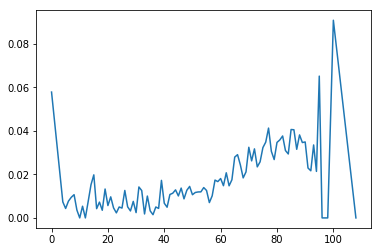

In [136]:
 plt.plot( merged['age'],merged['rate']) 

In [137]:
ages=merged['age'].values
miss_rates=merged['rate'].values



In [138]:
ages=np.concatenate([ages, np.zeros(2)])
miss_rates=np.concatenate([miss_rates, np.zeros(2)])

In [139]:
miss_rates_grouped = miss_rates.reshape(10,10)

rates_grouped_sum=np.sum(miss_rates_grouped, axis=1)

avg_rates_for_groups=np.divide(rates_grouped_sum,10)

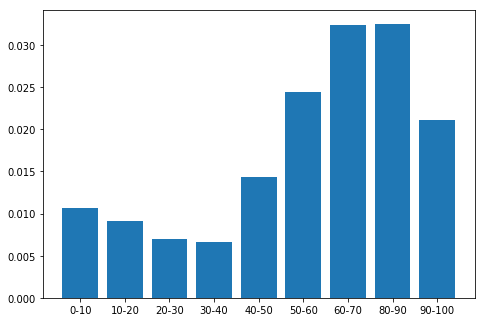

In [140]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['0-10', '10-20', '20-30', '30-40', '40-50', '40-50', '50-60', '60-70', '80-90', '90-100']
ax.bar(x,avg_rates_for_groups)
plt.show()

## analysis for sinus rhythm only

### By Gender

In [85]:
identif_attributes.head()

,y_pred,y_actual,patient_id,diagnosis,age,gender,race
0,34670.0,27049.0,27935.0,1806.0,21.0,1.0,0.0
1,23853.0,23853.0,24541.0,3041.0,39.0,0.0,0.0
2,5706.0,5706.0,5758.0,3169.0,56.0,1.0,0.0
3,3171.0,25422.0,26224.0,1814.0,43.0,1.0,0.0
4,5274.0,5274.0,5309.0,2392.0,60.0,1.0,0.0


In [142]:
new_diagnoses_codes_df[new_diagnoses_codes_df['DiagCode']=='SNR']

,ID,DiagCode
52,MUSE_20180210_130928_66000,SNR
60,MUSE_20180209_173743_30000,SNR
61,MUSE_20180209_173744_35000,SNR
218,MUSE_20180209_124011_82000,SNR
219,MUSE_20180210_124913_45000,SNR
...,...,...
40607,MUSE_20180209_123609_63000,SNR
40608,MUSE_20180209_130858_19000,SNR
40609,MUSE_20180209_132609_18000,SNR
45307,MUSE_20180116_124311_28000,SNR


In [143]:
labels[labels['file_name']=='MUSE_20180210_130928_66000'+'.csv']

,dataset_name,patient_id,file_name,age,gender,diagnosis,race,sample_num,race_encoded,gender_encoded,diagnosis_encoded,patient_id_encoded
32758,china_private,34722,MUSE_20180210_130928_66000.csv,78,Female,SNR,chinese,0,0,1,4668,17385


In [144]:
identif_attributes_sinus=identif_attributes[identif_attributes['diagnosis']==4668]
identif_attributes_sinus.head()

,y_pred,y_actual,patient_id,diagnosis,age,gender,race
24,35559.0,35559.0,36842.0,4668.0,31.0,1.0,0.0
43,14207.0,14207.0,14515.0,4668.0,43.0,0.0,0.0
45,14200.0,14200.0,14508.0,4668.0,43.0,0.0,0.0
63,16798.0,16798.0,17136.0,4668.0,79.0,1.0,0.0
80,14304.0,14304.0,14613.0,4668.0,28.0,1.0,0.0


In [145]:
identif_attributes_sinus.shape

(12335, 7)

In [146]:
missidentifications_sinus=identif_attributes_sinus[identif_attributes_sinus['y_actual']!=identif_attributes_sinus['y_pred']]
identifications_sinus=identif_attributes_sinus[identif_attributes_sinus['y_actual']==identif_attributes_sinus['y_pred']]


In [147]:
missidentifications_gender_count=missidentifications_sinus.groupby(['gender']).size().reset_index(name='miss_count')
identifications_gender_count=identifications_sinus.groupby(['gender']).size().reset_index(name='correct_count')


In [148]:
merged=identifications_gender_count.merge(missidentifications_gender_count, how='outer', on=['gender'])


In [149]:
merged['sum_classifications']=merged['correct_count']+merged['miss_count']

In [150]:
merged['rate']=merged['miss_count']/merged['sum_classifications']


In [151]:
merged.head()

,gender,correct_count,miss_count,sum_classifications,rate
0,0.0,5174,31,5205,0.005956
1,1.0,7105,25,7130,0.003506


### By Age

In [181]:
missidentifications_age_count=missidentifications_sinus.groupby(['age']).size().reset_index(name='miss_count')
identifications_age_count=identifications_sinus.groupby(['age']).size().reset_index(name='correct_count')

In [182]:
missidentifications_age_count=missidentifications_age_count[missidentifications_age_count['age']!=-1]
identifications_age_count=identifications_age_count[identifications_age_count['age']!=-1]

In [183]:
missidentifications_age_count.shape

(35, 2)

In [184]:
identifications_age_count.shape

(93, 2)

In [185]:
identifications_age_count

,age,correct_count
0,0.0,179
1,4.0,6
2,5.0,9
3,6.0,10
4,7.0,6
...,...,...
88,92.0,5
89,93.0,5
90,94.0,2
91,97.0,2


In [186]:
merged=identifications_age_count.merge(missidentifications_age_count, how='outer', on=['age'])


In [187]:
merged=merged.fillna(0)

In [188]:
merged['sum_classifications']=merged['correct_count']+merged['miss_count']

In [189]:
merged['rate']=merged['miss_count']/merged['sum_classifications']


In [190]:
merged.shape

(93, 5)

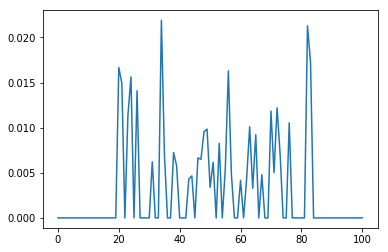

In [191]:
 plt.plot( merged['age'],merged['rate']) 

In [192]:
ages=merged['age'].values
miss_rates=merged['rate'].values



In [193]:
ages=np.concatenate([ages, np.zeros(7)])
miss_rates=np.concatenate([miss_rates, np.zeros(7)])

In [194]:
miss_rates_grouped = miss_rates.reshape(10,10)

rates_grouped_sum=np.sum(miss_rates_grouped, axis=1)

avg_rates_for_groups=np.divide(rates_grouped_sum,10)

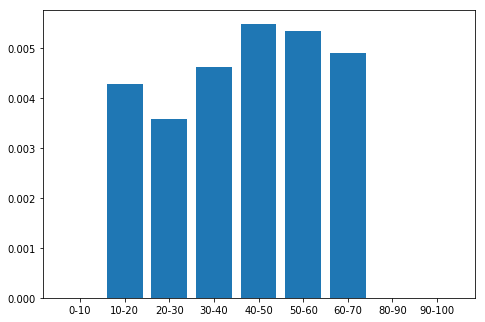

In [195]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['0-10', '10-20', '20-30', '30-40', '40-50', '40-50', '50-60', '60-70', '80-90', '90-100']
ax.bar(x,avg_rates_for_groups)
plt.show()